# Alunos:

### Carlos Eduardo Fontaneli, RA 769949
### Yuri Said Sunbali, RA 790982

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import mean, std, array
from math import ceil, cos, sin, atan
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from mlxtend.plotting import plot_confusion_matrix

### Conjunto de Dados
Carregando o conjunto de dados.
O conjunto de dados escolhido foi o load_digits da biblioteca sklearn.

In [2]:
numbers = load_digits(as_frame=True)

X = numbers.data
y = numbers.target

X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


### Folders
Dividindo o conjunto de dados em 10 folders.

In [3]:
n_folds = 10

X_folds = []
y_folds = []

# Quantidade de linhas do datafram por fold
n_row = ceil(len(X) / n_folds)

for i in range(1, n_folds + 1):
  # Limite superior do index dos dados de cada fold
  lim = i * n_row
  
  # O último fold recebe os dados restantes
  if i == n_folds:
    X_folds.append(X[int(lim - n_row):])
    y_folds.append(y[int(lim - n_row):])
  
  else:
    # Adicionando os dados a cada fold
    X_folds.append(X[int(lim - n_row):int(lim)])
    y_folds.append(y[int(lim - n_row):int(lim)])
  
X_folds[9]



,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1620,0.0,0.0,4.0,15.0,16.0,6.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,3.0,14.0,16.0,10.0,1.0,0.0
1621,0.0,0.0,0.0,12.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,13.0,0.0,0.0,0.0
1622,0.0,0.0,7.0,14.0,16.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,5.0,0.0,0.0,0.0,0.0
1623,0.0,0.0,0.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,0.0,5.0,14.0,16.0,4.0,0.0
1624,0.0,1.0,11.0,16.0,16.0,12.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,14.0,16.0,16.0,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


### Treino, Testes e Avaliação
Separando os folds entre folds de treino e folds de teste. Em seguida treina o modelo e, na sequência, efetua os testes e aplica as métricas/avalia o modelo. Foi avaliado com a matriz de confusão e com o método classification_reports().

In [4]:
mlp_clf = MLPClassifier(solver='sgd', 
                    learning_rate="constant", 
                    learning_rate_init=0.05,
                    hidden_layer_sizes=(150,),
                    max_iter=150)

matrix = []
reports = []


k_folds = []
for i in range(10):
  # Conjunto de teste de iteração
  X_test = X_folds[i]
  y_test = y_folds[i]
  
  # Conjunto de treino para x e y, todos aqueles que não fazem parte do teste
  x_train = pd.DataFrame()
  for fold in X_folds:
    if X_test.equals(fold) == False:
      x_train = pd.concat([x_train, fold])

      
  y_train = pd.DataFrame()
  for fold in y_folds:
    if y_test.equals(fold) == False:
      y_train = pd.concat([y_train, fold])
      
  # Treinando o modelo
  model = mlp_clf.fit(x_train, y_train.values.ravel())
  
  # Testando o modelo
  y_pred = model.predict(X_test)
  
  matrix.append(confusion_matrix(y_test, y_pred))
  reports.append(classification_report(y_test, y_pred, output_dict=True))
  
  if i == 9:
    j = 0
    for coef in mlp_clf.coefs_:
      print(f'Camada{j}')
      print(coef, '\n')
      j += 1

/home/fonta42/anaconda3/envs/IA/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fonta42/anaconda3/envs/IA/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fonta42/anaconda3/envs/IA/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/

Camada0
[[ 0.15961207  0.04769111 -0.08881236 ... -0.16663619 -0.04973306
   0.10907603]
 [-0.06429204  0.13903039  0.13188131 ...  0.03394009 -0.07121691
  -0.02518849]
 [-0.02161188 -0.12537719 -0.13901768 ... -0.11506643 -0.52401748
  -0.11786107]
 ...
 [ 0.01932811 -0.3838884   0.00288592 ... -0.27040913 -0.34045327
  -0.41729205]
 [-0.0281162  -0.26921481 -0.10857508 ... -0.01328174 -0.13108101
  -0.08363899]
 [ 0.0736016  -0.17906141  0.03305158 ...  0.02927667  0.01711735
  -0.14089677]] 

Camada1
[[ 0.08265693 -0.03065996  0.17212335 ...  0.01770557  0.11182846
   0.07500648]
 [-0.88835609  0.01445179  0.11760845 ...  0.28385052  0.29278069
  -0.50601316]
 [-0.09416603 -0.04271473  0.1741815  ... -0.18554656  0.05146281
  -0.14620756]
 ...
 [ 0.22377249 -0.06240898 -0.16457846 ... -0.09000742  0.22447769
  -0.12397069]
 [ 1.13205562 -0.98263714 -3.0245231  ... -0.26561983  0.28642727
   1.42485873]
 [ 1.77124548  1.84061227  1.94276408 ...  1.39594353  2.1539738
   1.66409362]]

### Matrizes de Confusão
Plotando as matrizes de confusao.

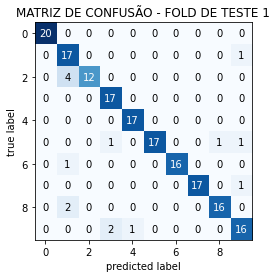

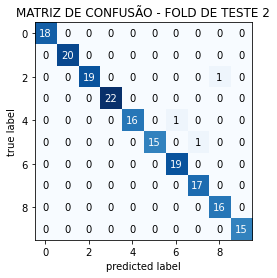

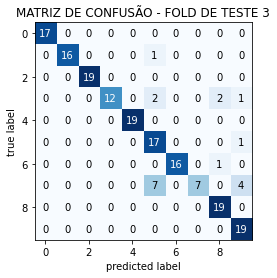

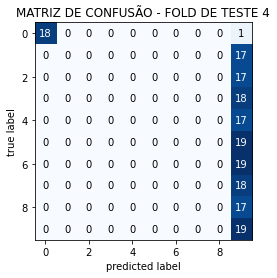

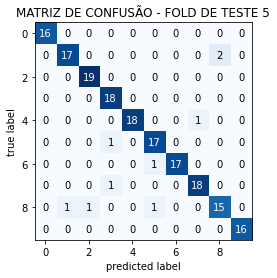

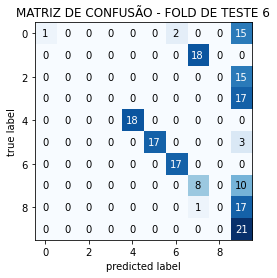

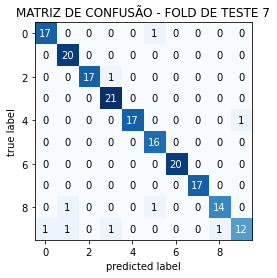

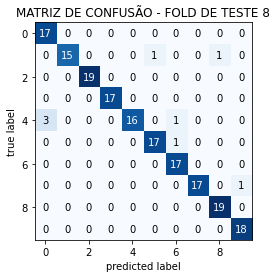

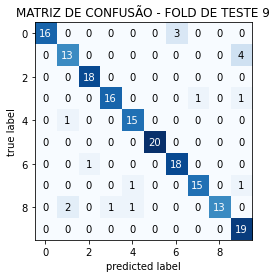

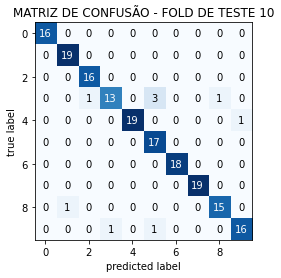

In [5]:
for i, c_matrix in enumerate(matrix, start=1):
  fig, ax = plot_confusion_matrix(conf_mat=c_matrix)
  plt.title(f'MATRIZ DE CONFUSÃO - FOLD DE TESTE {i}')
  plt.show()

### Métricas dos folds
Imprimindo as métricas dos folds.

In [6]:
for i, report in enumerate(reports, start=1):
  report = pd.DataFrame(report).transpose()
  print(f'Métricas do fold {i}:\n{report}\n\n')

Métricas do fold 1:
              precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   20.000000
1              0.708333  0.944444  0.809524   18.000000
2              1.000000  0.750000  0.857143   16.000000
3              0.850000  1.000000  0.918919   17.000000
4              0.944444  1.000000  0.971429   17.000000
5              1.000000  0.850000  0.918919   20.000000
6              1.000000  0.941176  0.969697   17.000000
7              1.000000  0.944444  0.971429   18.000000
8              0.941176  0.888889  0.914286   18.000000
9              0.842105  0.842105  0.842105   19.000000
accuracy       0.916667  0.916667  0.916667    0.916667
macro avg      0.928606  0.916106  0.917345  180.000000
weighted avg   0.928871  0.916667  0.917932  180.000000


Métricas do fold 2:
              precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   18.000000
1              1.000000  1.000000  1.000000   20.000000
2     

Calculando as médias e desvios padrões de cada classe final possível para as 4 métricas do classification_report().

In [7]:
# Declarando as listas para as métricas
precision = [[], [], [],[], [], [],[], [], [], [], [], []]
recall = [[], [], [],[], [], [],[], [], [], [], [], []]
f1 = [[], [], [],[], [], [],[], [], [], [], [], []]
support = [[], [], [],[], [], [],[], [], [], [], [], []]
ac = []
ma = [[], [], [], []]
wa = [[], [], [], []]
for report in reports:
  data = pd.DataFrame(report).transpose()
  for i in range(10):
    precision[i].append(data['precision'][i])
    recall[i].append(data['recall'][i])
    f1[i].append(data['f1-score'][i])
    support[i].append(data['support'][i])
  
  # acurracy
  ac.append(data['precision'][10])
  
  # macro avg
  ma[0].append(data['precision'][11])
  ma[1].append(data['recall'][11])
  ma[2].append(data['f1-score'][11])
  ma[3].append(data['support'][11] / 10)
  
  # weightened
  wa[0].append(data['precision'][12])
  wa[1].append(data['recall'][12])
  wa[2].append(data['f1-score'][12])
  wa[3].append(data['support'][12] / 10)
  
  
for i in range(10):
  precision[10].append(mean(precision[i]))
  precision[11].append(std(precision[i]))
  recall[10].append(mean(recall[i]))
  recall[11].append(std(recall[i]))
  f1[10].append(mean(f1[i]))
  f1[11].append(mean(f1[i]))
  support[10].append(mean(support[i]))
  support[11].append(std(support[i]))

# aqui uma matriz 
data = array([precision[10],
              precision[11],
              recall[10],
              recall[11],
              f1[10],
              f1[11],
              support[10],
              support[11]])

final_data = pd.DataFrame(
  {
    'precision - media' : data[0],
    'precision - dp' : data[1],
    'recall - media' : data[2], 
    'recall - dp' : data[3], 
    'f1-score - media' : data[4], 
    'f1-score - dp' : data[5],
    'support-media': data[6], 
    'support-dp' : data[7],
  }
)

final_data

,precision - media,precision - dp,recall - media,recall - dp,f1-score - media,f1-score - dp,support-media,support-dp
0,0.979444,0.046218,0.878947,0.278608,0.885589,0.885589,17.8,1.249000
1,0.732437,0.376587,0.742742,0.377493,0.735026,0.735026,18.2,1.166190
2,0.783854,0.392625,0.764444,0.389002,0.771996,0.771996,17.7,1.552417
3,0.753279,0.379462,0.731699,0.381597,0.737520,0.737520,18.3,1.676305
4,0.882680,0.296528,0.852049,0.289280,0.865787,0.865787,18.1,1.300000
5,0.816722,0.293949,0.847083,0.287112,0.826041,0.826041,18.2,1.469694
6,0.859662,0.291225,0.877417,0.293685,0.867407,0.867407,18.1,1.044031
7,0.812561,0.339651,0.755194,0.332503,0.768630,0.768630,17.9,0.700000
8,0.744918,0.374104,0.729943,0.372251,0.734971,0.734971,17.4,1.113553
9,0.750530,0.304378,0.948099,0.085346,0.784711,0.784711,18.0,1.732051


### Médias e Desvios Padrões
Calculando e imprimindo as médias e desvios padrões das métricas acurracy(única para cada fold), macro avg e weighted avg, sendo que as duas últimas possuem valores próprios para as métricas precision, recall, f1-score e supoort.

In [8]:
print('Análises da métrica - ACCURACY\n')

print(f'Média: {mean(ac)}\n\
Desvio padrão: {std(ac)}\n')

Análises da métrica - ACCURACY

Média: 0.8165819209039548
Desvio padrão: 0.2505961959425226



In [9]:
print('Análises da métrica - MACRO AVG\n')

print(f'Média precision: {mean(ma[0])}\n\
Desvio padrão precision: {std(ma[0])}\n')

print(f'Média recall: {mean(ma[1])}\n\
Desvio padrão recall: {std(ma[1])}\n')

print(f'Média f1-score: {mean(ma[2])}\n\
Desvio padrão f1-score: {std(ma[2])}\n')

print(f'Média support: {mean(ma[3])}\n\
Desvio padrão support: {std(ma[3])}\n')

Análises da métrica - MACRO AVG

Média precision: 0.8116086842583556
Desvio padrão precision: 0.27826588840529765

Média recall: 0.8127618249054007
Desvio padrão recall: 0.25596485113014406

Média f1-score: 0.7977677156312211
Desvio padrão f1-score: 0.2841302778013285

Média support: 17.97
Desvio padrão support: 0.0900000000000002



In [10]:
print('Análises da métrica - WEIGHTED AVG\n')

print(f'Média precision: {mean(wa[0])}\n\
Desvio padrão precision: {std(wa[0])}\n')

print(f'Média recall: {mean(wa[1])}\n\
Desvio padrão recall: {std(wa[1])}\n')

print(f'Média f1-score: {mean(wa[2])}\n\
Desvio padrão f1-score: {std(wa[2])}\n')

print(f'Média support: {mean(wa[3])}\n\
Desvio padrão support: {std(wa[3])}\n')

Análises da métrica - WEIGHTED AVG

Média precision: 0.8133395900181954
Desvio padrão precision: 0.2755060421486653

Média recall: 0.8165819209039548
Desvio padrão recall: 0.2505961959425226

Média f1-score: 0.7999426439623225
Desvio padrão f1-score: 0.28112165200859746

Média support: 17.97
Desvio padrão support: 0.0900000000000002

